# [WIP] Magnetic Field Gradient Simulation

This notebook implements a simulation of the gradient of a magnetic field applied to a population of spins.

In [24]:
from pyMRI.pymri import population_transverse_decay, max_frequency
from pyMRI.utils import rerange
import numpy as np
import matplotlib.pyplot as plt
from typing import Literal

In [25]:
t0 = 0.0
tn = 300.0
dt = 0.001

print("The maximum frequency that can be captured here is:", max_frequency(t0, tn, dt), "Hz")

The maximum frequency that can be captured here is: 150000.0 Hz


In [26]:
n = 300

## B gradient

In [27]:
def B_gradient(x : np.ndarray, G : float, type : Literal["linear", "quadratic"]) -> np.ndarray:
    if type == "linear":
        return G*x
    elif type == "quadratic":
        return G*x**2

In [28]:
x_dist = 1.0

spins_x = np.random.rand(n)

spins_x = rerange(spins_x, -x_dist, x_dist)

In [29]:
T2s = np.full(n, 1000.0) 

phis = np.zeros(n)

echos = np.array([])

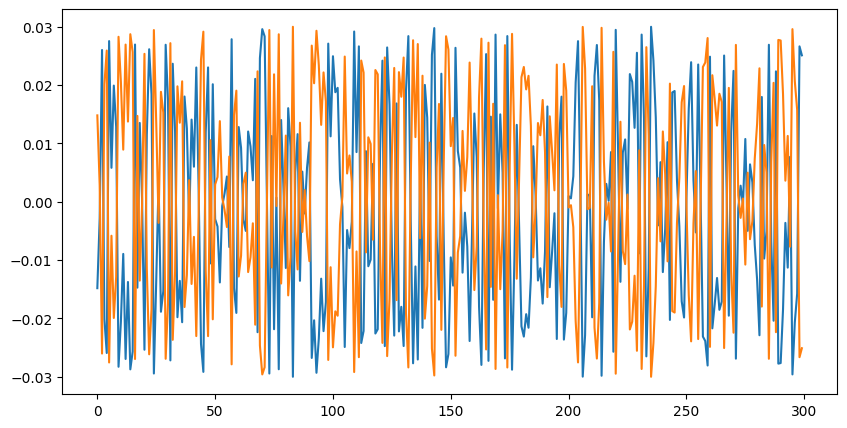

In [30]:
B0 = np.full(n, 0.0)
G_x = 0.03
DB = B_gradient(spins_x, G_x, 'linear')
DB_ = B_gradient(spins_x, -G_x, 'linear')

B = B0 + DB
B_ = B0 + DB_

plt.figure(figsize = (10, 5))
plt.plot(np.arange(n), B)
plt.plot(np.arange(n), B_)

gamma = 10.0

ws0 = gamma*B
ws1 = gamma*B_

In [31]:
S, t, phis_2 = population_transverse_decay(t0, tn, dt, T2s, 1.0, ws0, phis, echos, return_phase = True)
S_, t_ = population_transverse_decay(tn, 2*tn, dt, T2s, 1.0, ws1, phis_2, echos)

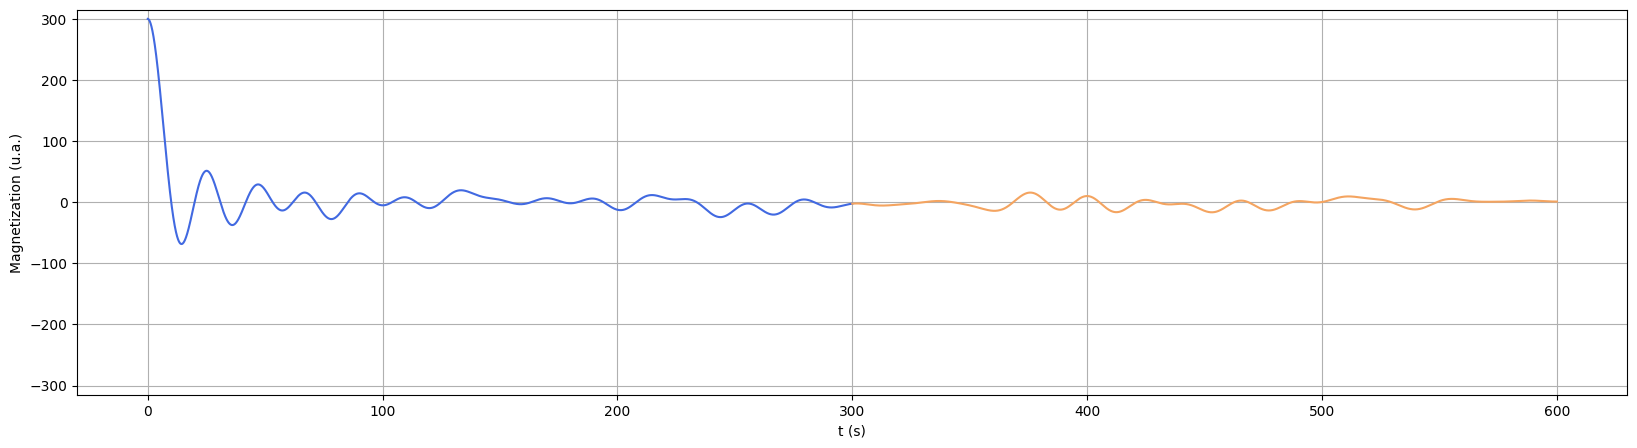

In [32]:

plt.figure(figsize=(20, 5))
plt.plot(t, S, c = "royalblue")
plt.plot(t_, S_, c = "sandybrown")
plt.ylim(-n - 0.05*n, n + 0.05*n)
plt.xlabel("t (s)")
plt.ylabel("Magnetization (u.a.)")
plt.grid()

# Test example

(300000,)


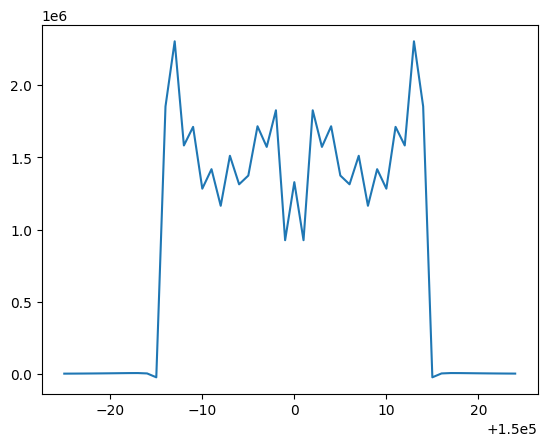

In [33]:
from numpy.fft import fft, ifft, fftshift, fftfreq

ff = fft(S)
ff = fftshift(ff)

print(np.unique(ff).shape)

plt.plot(np.arange(0.0, ff.shape[0])[149975:150025], ff.real[149975:150025])

In [34]:
n = 500
phis = np.zeros(n)
epsilon = 0.1
B0 = 1.0
gamma = 10.00
w0 = gamma*B0
T2s = np.full(n, 1000.0) 
ws = rerange(np.random.rand(n), -epsilon, epsilon) + w0

t0 = 0.0
tn = 300.0
dt = 0.001

echos = np.array([30.0, 125.0])

S, t = population_transverse_decay(t0, tn, dt, T2s, 1.0, ws0, phis, echos)

IndexError: index 300 is out of bounds for axis 0 with size 300

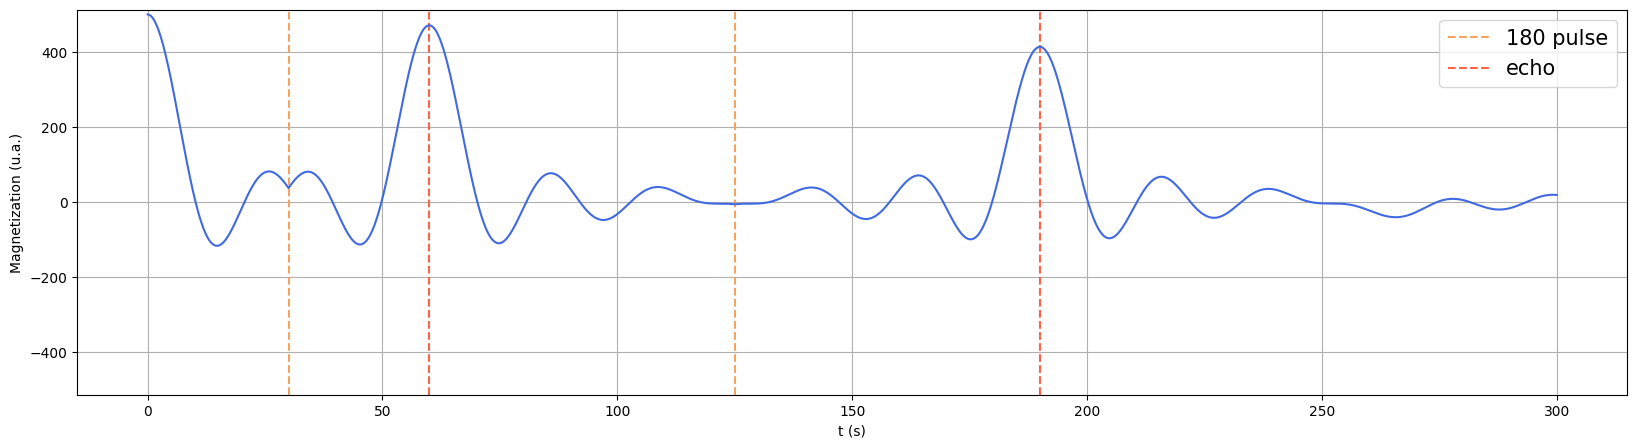

In [ ]:
s0, sn = np.where(t == t0)[0][0], np.where(t == tn - dt)[0][0] 

echos_lines = np.zeros_like(echos)
echos_lines[0] = 2*echos[0]
for i in range(1, echos.shape[0]):
    echos_lines[i] = (2*echos[i] - echos_lines[i-1])*int(i != 1) + 2*(echos[i] - echos[i-1])*int(i == 1)

plt.figure(figsize=(20, 5))
plt.vlines(echos, -n - 0.025*n, n + 0.025*n, colors="sandybrown", linestyles= "dashed", label="180 pulse")
plt.vlines(echos_lines, -n - 0.025*n, n + 0.025*n, colors="tomato", linestyles= "dashed", label="echo")
plt.plot(t[s0:sn], S[s0:sn], c = "royalblue")
plt.ylim(-n - 0.025*n, n + 0.025*n)
plt.xlabel("t (s)")
plt.ylabel("Magnetization (u.a.)")
plt.grid()
plt.legend(fontsize = 15)